# Pymaceuticals Inc.
---

### Analysis

- When the timepoint (days) increase the Tummer volume decrease for micess treated with Capomulin Treatmen
- Only Infubinol treated data has one outlier
- There exists a postive and strong correlation between the Capomulin average weight (g) and average tummer volume (mm3)

 

In [41]:
%matplotlib notebook

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns  
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path) 
# Combine the data into a single dataset
Merged_df = study_results_df.merge(mouse_metadata_df, on = "Mouse ID", how = 'left')
Tumer_Volume =Merged_df['Tumor Volume (mm3)']
# Display the data table for preview
Merged_df.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.

print(f"The number of mice is:{len(Merged_df['Mouse ID'].value_counts())}")

The number of mice is:249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

Duplicated_Mice_ID = Merged_df.loc[Merged_df.duplicated(subset = ["Mouse ID","Timepoint",]), "Mouse ID"].unique()

Duplicated_Mice_ID


array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID.

Data_Duplicated_Mice = Merged_df[Merged_df['Mouse ID'].isin(Duplicated_Mice_ID)==True]

print(f"Total Number of Duplicated Mouse IDs are:{Data_Duplicated_Mice.duplicated().count()}")

Data_Duplicated_Mice

Total Number of Duplicated Mouse IDs are:13


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

Cleaned_data_df = Merged_df[Merged_df['Mouse ID'].isin(Duplicated_Mice_ID)==False]
Cleaned_data_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
print(len(Cleaned_data_df['Mouse ID'].value_counts()))

248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
 
regimen_mean = Cleaned_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
regimen_median =Cleaned_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
regimen_variance = Cleaned_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
regimen_std = Cleaned_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
regimen_sem = Cleaned_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

Summary_Table_Statistics = pd.DataFrame({"Mean Tumor Volume":regimen_mean,"Median Tumor Volume":regimen_median,"Tumor Volume Variance":regimen_variance
                                        , "Tumor Volume Std. Dev.":regimen_std, "Tumor Volume Std. Err.":regimen_sem})
Summary_Table_Statistics



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

Aggregate_Summary_Table = Cleaned_data_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
Aggregate_Summary_Table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<IPython.core.display.Javascript object>


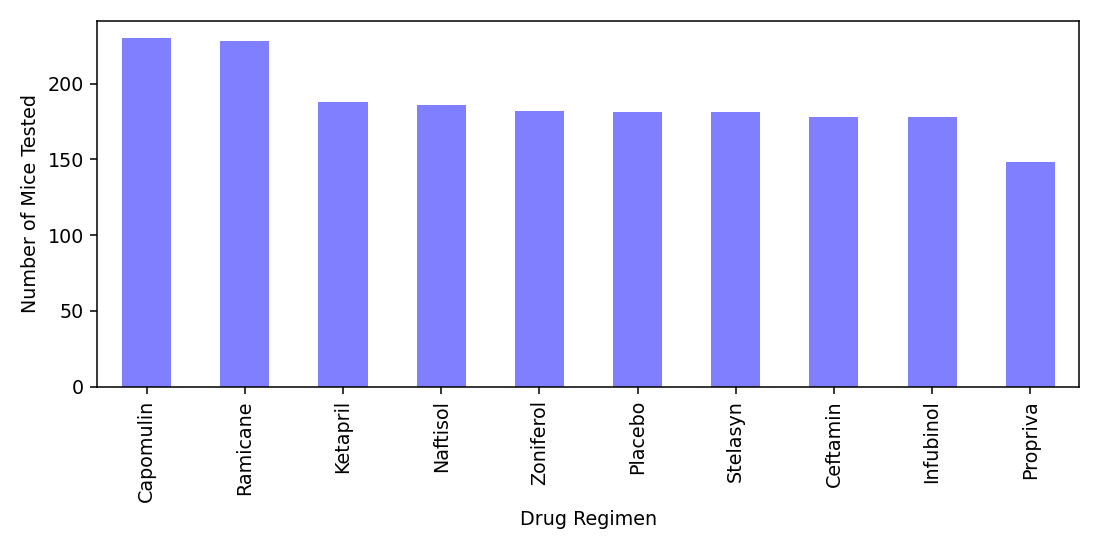

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
Mice_per_Treatment = Cleaned_data_df.groupby("Drug Regimen")['Timepoint'].count().sort_values(ascending = False)
plt.figure(figsize=(8,4))
Mice_per_Treatment.plot.bar(facecolor="b", xlabel="Drug Regimen",
                               ylabel="Number of Mice Tested", alpha = 0.5)
plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>


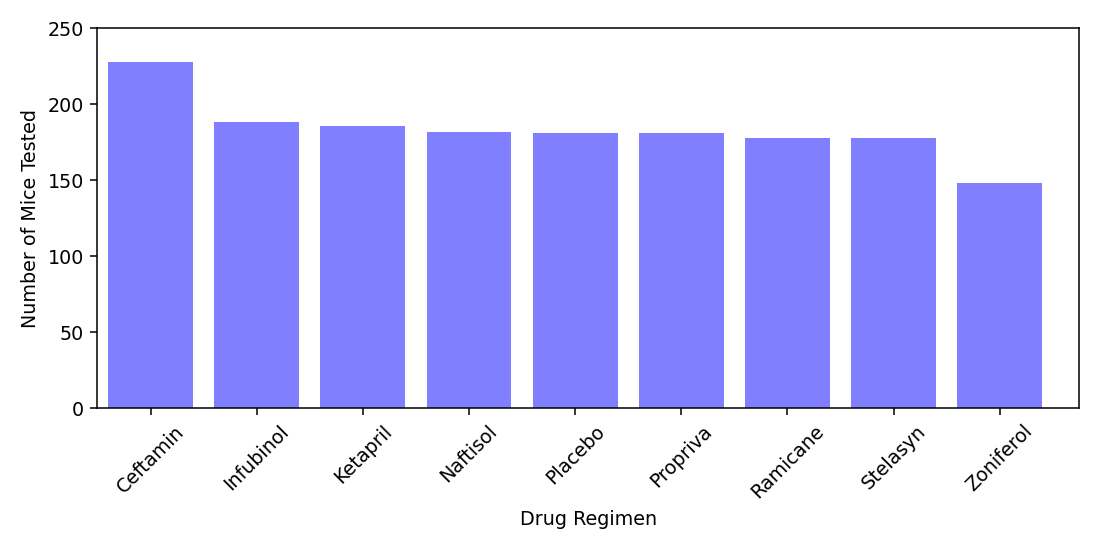

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

Drug_Regimen = ['Capomulin', 'Ceftamin', 'Infubinol',  'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 
                            'Ramicane', 'Stelasyn', 'Zoniferol']
x_axis = np.arange(len(Mice_per_Treatment.index))
y_axis = Mice_per_Treatment.values
plt.figure(figsize=(8,4))
plt.bar(x_axis, y_axis, color= 'b',alpha=0.5) 
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Drug_Regimen)
plt.xticks(rotation = 45)

plt.xlim(0.5, len(x_axis)-0.25)
plt.ylim(0, max(y_axis)+20)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>


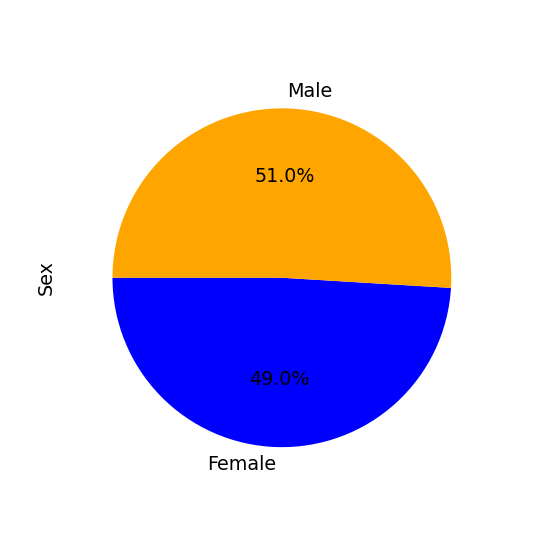

<AxesSubplot:ylabel='Sex'>

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
plt.figure(figsize=(4,4))
Count_sex_df = Cleaned_data_df.groupby(["Sex"])["Sex"].count()
Count_sex_df.plot.pie(colors = ['blue','orange'],autopct = '%1.1f%%',figsize=(4, 4),startangle = 180)


<IPython.core.display.Javascript object>


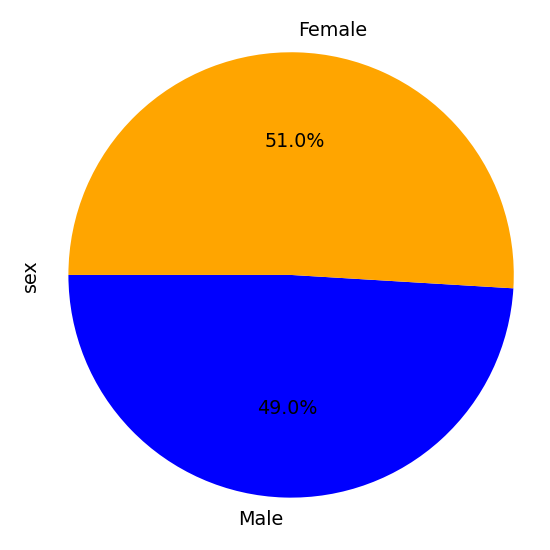

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(4,4))
plt.pie(Count_sex_df, colors = ['blue', 'orange'],labels =['Male','Female'], autopct = '%1.1f%%',
       startangle = 180)
plt.ylabel("sex")
plt.axis("equal")
plt.tight_layout()
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

Greatest_Timepoint_df = Cleaned_data_df.groupby(['Mouse ID'])['Timepoint'].max()
#Create a DataFrame
Last_Greatest_df = pd.DataFrame(Greatest_Timepoint_df) 
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

LastPT_Tumer_Volume_df = Cleaned_data_df.merge(Last_Greatest_df, on=('Mouse ID', 'Timepoint'), how = 'right')
LastPT_Tumer_Volume_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
Tumer_Volume_df = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for name in Treatments:
    
    Iterate_df = LastPT_Tumer_Volume_df.loc[LastPT_Tumer_Volume_df['Drug Regimen'] == name]

    # Add subset dataframes 
    Final_Timepoint_volume_df =  Iterate_df.loc[Iterate_df['Timepoint'] ==  Iterate_df['Timepoint']]
    
    # Create a series that consists of all final volume values for each regimen and append to the empty list
    Final_Volume_Values = Final_Timepoint_volume_df['Tumor Volume (mm3)']
    Tumer_Volume_df.append(Final_Volume_Values)


  # Calculate and print the interquartile range (IQR) for each regimen
    quartiles = Final_Volume_Values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    Median = quartiles[0.5]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {name}: {iqr}')
    
    # Find upper and lower bounds to help identify outliers for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {name}: {lower_bound}')
    print(f'Median for {name}: {Median}')
    print(f'Upper Bound for {name}: {upper_bound}')
    
    # Quantitatively check for outliers
    outliers_count = (Final_Volume_Values.loc[(Final_Timepoint_volume_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (Final_Timepoint_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {name} outliers: {outliers_count}')
    print('---------------------------------------------------------')


IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Median for Capomulin: 38.1251644
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
---------------------------------------------------------
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Median for Ramicane: 36.56165229
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
---------------------------------------------------------
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Median for Infubinol: 60.16518046
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
---------------------------------------------------------
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Median for Ceftamin: 59.85195552
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0
---------------------------------------------------------


<IPython.core.display.Javascript object>


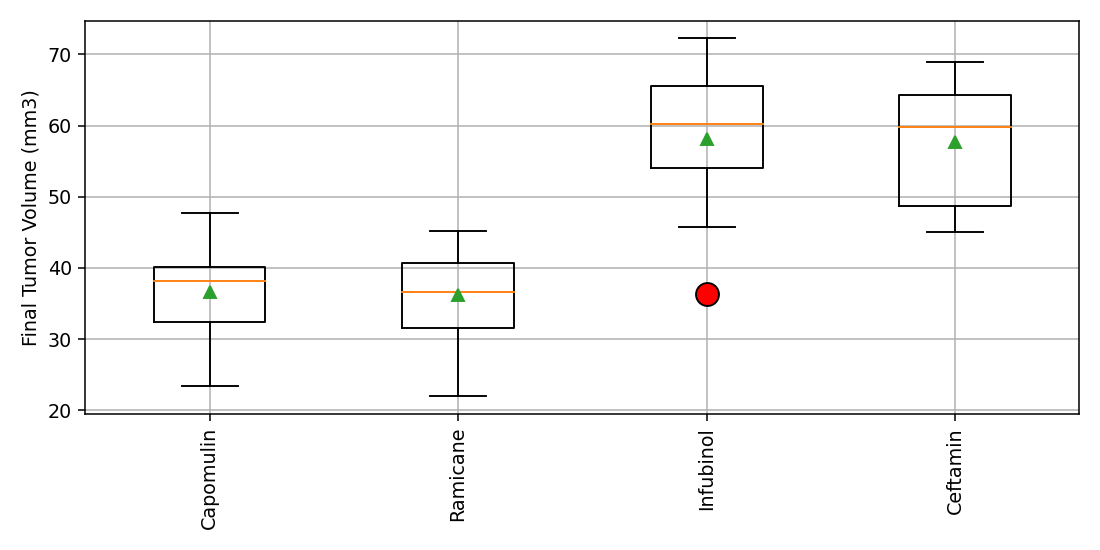

In [30]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group

# Edit outliers on boxplot for visibility
flierprops = dict(marker = 'o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='black')

# Plot boxplot
plt.figure(figsize=(8,4))
plt.boxplot(Tumer_Volume_df, flierprops=flierprops,showmeans = True)


# Add title and labels to boxplot

plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'],rotation = 'vertical') 
plt.grid()
plt.tight_layout()
plt.show()


## Line and Scatter Plots

<IPython.core.display.Javascript object>


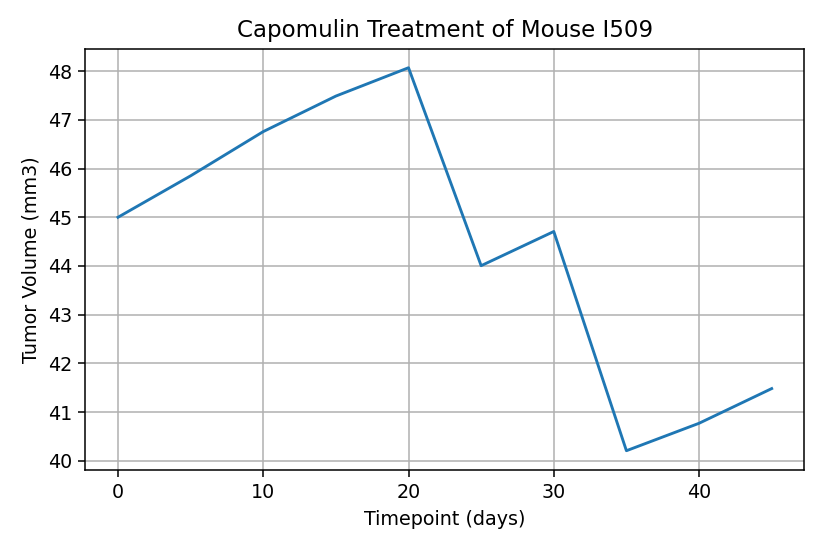

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Select a mouth ID and data points of a mouse treated with Capomulin, Here Mouth ID l509 is selected
selected_mouse = Cleaned_data_df.loc[Cleaned_data_df['Mouse ID'] == 'l509']

# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis
plt.figure(figsize=(6,4))
plt.plot(selected_mouse['Timepoint'], selected_mouse['Tumor Volume (mm3)'])

# Add labels and title to plot
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse I509")
plt.grid()
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


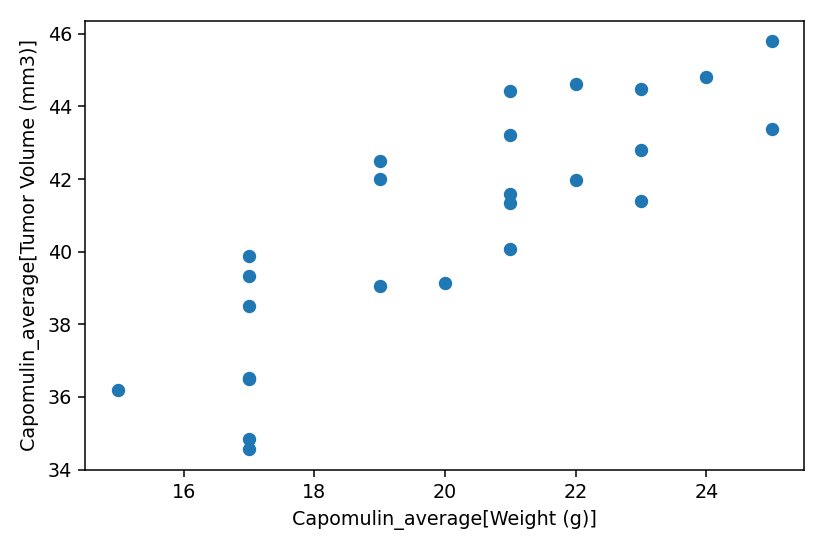

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# created dataframe using .loc() of the drug regimine Capomulin using a boolean
Capomulin_df = Cleaned_data_df.loc[Cleaned_data_df["Drug Regimen"] == "Capomulin"]
# use groupby() and mean() to create a dataframe
Capomulin_average = Capomulin_df.groupby(['Mouse ID']).mean()
# created scatter plot of the x axis (weight) and the y axis (tumor size) 
plt.figure(figsize=(6,4))
x = Capomulin_average['Weight (g)']
y = Capomulin_average['Tumor Volume (mm3)']
plt.scatter(x,y)
plt.ylabel('Capomulin_average[Tumor Volume (mm3)]')
plt.xlabel('Capomulin_average[Weight (g)]')
plt.tight_layout()
plt.show()


## Correlation and Regression

In [55]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


Correlation_Weight_AvgTumer=st.pearsonr(Capomulin_average['Weight (g)'],Capomulin_average['Tumor Volume (mm3)'])
if(Correlation_Weight_AvgTumer ==-1):
    print("Perfect negative correlation")
elif(Correlation_Weight_AvgTumer ==1):
        print("Perfect positive correlation")
elif(Correlation_Weight_AvgTumer ==0):
        print("No correlation")
else:
    print(f"Real-world is never perfect but can have strong correlation .The correlation between both factors is {round(Correlation_Weight_AvgTumer[0],2)}")



Real-world is never perfect but can have strong correlation .The correlation between both factors is 0.84


<IPython.core.display.Javascript object>


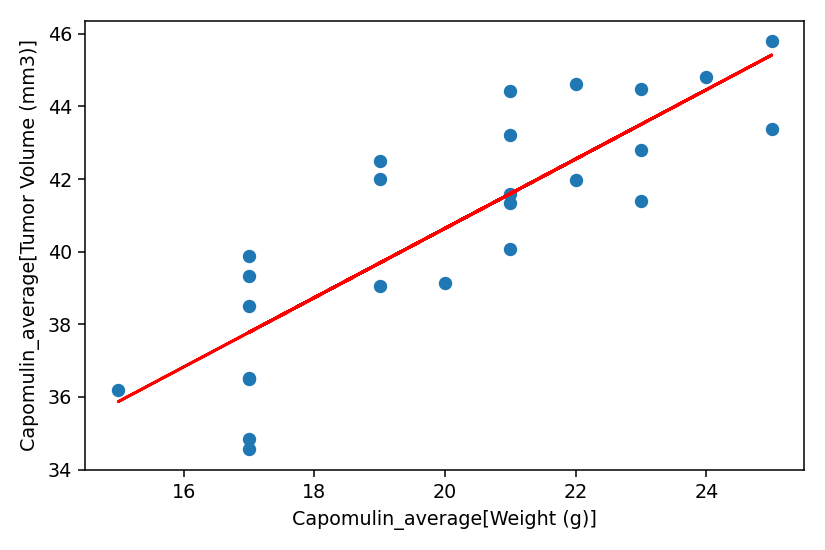

The line equation is :y = 0.95x + 21.55


In [57]:
# Add the linear regression equation and line to plot
x_values = Capomulin_average['Weight (g)']
y_values =Capomulin_average['Tumor Volume (mm3)']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.subplots(figsize=(6,4))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Capomulin_average[Weight (g)]')
plt.ylabel('Capomulin_average[Tumor Volume (mm3)]')
plt.annotate(line_eq,(5,0.8),fontsize=15,color="red")
print(f"The line equation is :{line_eq}")
plt.tight_layout()
plt.show()